# Text mining project

---

# Emotion Analysis of "Queen" Lyrics


---


# Realized by Yasmine Dimassi 

---
---

### Goal of the project : Extracting useful emotion and mood information from Queen* songs by analyzing it’s words (lyrics)


#####  ---- Before doing the text mining, I did web scraping of a lyrics website to get the data needed.

### • Install the needed modules

In [ ]:
!pip3.7 install requests
!pip3.7 install requests-HTML
!pip3.7 install pandas
!pip3.7 install regex
!pip3.7 install urlparse4
!pip3.7 install nltk
!pip3.7 install wordcloud
!pip3.7 install vaderSentiment

# 1.Web Scraping

### • Importing the needed modules 

In [1]:
import requests
import json
from requests_html import HTMLSession
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from time import sleep
from random import randint

### • Extracting all songs urls 
- First, I will send a HTTP request to the lyrics website URL. As a response, I get the html code.

In [ ]:
url = "https://www.azlyrics.com/q/queen.html"
website = "https://www.azlyrics.com"
headers = {'User-Agent': 'Mozilla/5.0'}

#sending a post request to get the html of the page
req = Request(url)
req.headers = headers

print("Sending a request to: ", req.get_full_url())
print("Using as User-Agent: ", req.get_header('User-Agent'))

response = urlopen(req)
html = response.read()


- Once I got the HTML of the page that redirects to all Queen's songs, I will extract from it the song links using the Beautiful Soup library. It will help me to extract text from specific HTML tags.

In [ ]:
soup = BeautifulSoup(html)          
songs_urls = []

for a in soup.findAll('div', {"class": "listalbum-item"}):   
    for b in a.findAll('a'):          
        url = website + b.get('href')[2:]                              
        songs_urls.append(url)


### • Extracting song lyrics from each url previously extracted 
- Now that I have the URL of each song, I will, once again send HTTP request to each song URL. Since the html containing the lyrics is not surrounded by specific tags, I will just extract the HTML  containing the tags my self. Then I will clean the HTML from the lyrics and store them as a value and the name of the song as a key in the songs_lyrics dictionnary. 

In [ ]:
songs_lyrics = dict()

for url in songs_urls:

    #update song name
    song_name = url[38:-5]
    print("\nsong url : ", url)
    print("\nScraping song: ", song_name)
    
    #getting the html of the url 
    req = Request(url)
    req.headers = headers

    response = urlopen(req)
    html = response.read()
    
    #sleep between extracting pages so that we don't apear suspicious to the website      
    sleep(randint(2, 10))
    
    #extract the text out of the html 
    html_text = str(html)
    
    #extracting the part of the html text that contains mostly the lyrics 
    start_text = "<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->"
    end_text = "<!-- MxM banner -->"

    start_index = html_text.index(start_text)
    end_index = html_text.index(end_text)

    lyrics = html_text[start_index + len(start_text) : end_index]

    #cleaning the lyrics mostly from html
    lyrics = lyrics.replace(",", " ").replace("\n", " ").replace("\\n", " ").replace("\\r", " ").replace("\\", "").replace("<br>", " ").replace("</div>", " ")
    
    #updating song lyrics    
    songs_lyrics[song_name] = lyrics
    print("\nsong lyrics : ", lyrics)


### • Converting the data scraped into a csv file.
- I will do this so that I can use it later without redoing the webscraping part.

In [ ]:
import csv

with open('scraped_lyrics.csv', 'w') as f:
    f.write("song,lyrics\n")
    for key in songs_lyrics.keys():
        f.write("%s,%s\n"%(key,songs_lyrics[key]))

# 2.Text mining 

### • Importing the needed modules 

In [1]:
import pandas as pd
import numpy as np 
from string import punctuation
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## 2.1 Data description

### •  Reading the data 

In [164]:
df = pd.read_csv('scraped_lyrics.csv')

### • Showing the dataframe

- Let's visualise the data frame rows 

In [3]:
df.head()

,song,lyrics
0,jealousy,Oh how wrong can you be? Oh to fall in love...
1,bicyclerace,Bicycle bicycle bicycle I want to ride my b...
2,ifyoucantbeatthem,Keep your chin up when you're feeling lonely...
3,letmeentertainyou,Let me welcome you ladies and gentlemen I w...
4,deadontime,Fool always jumping never happy where you la...


- Let's now visualise the lyrics text of a specific song "Bicycle Race"

In [4]:
list(df[df["song"] == "bicyclerace"].iloc[0])[1]

"  Bicycle bicycle bicycle  I want to ride my bicycle bicycle bicycle  I want to ride my bicycle  I want to ride my bike  I want to ride my bicycle  I want to ride it where I like    You say &quot;black&quot;  I say &quot;white&quot;  You say &quot;bark&quot;  I say &quot;bite&quot;  You say &quot;shark&quot;  I say &quot;Hey man   Jaws was never my scene  And I don't like Star Wars!&quot;    You say &quot;Rolls&quot;  I say &quot;Royce&quot;  You say &quot;God&quot; - Give me a choice!  You say &quot;Lord&quot;  I say &quot;Christ!&quot;  I don't believe in Peter Pan   Frankenstein or Superman  All I wanna do is    Bicycle bicycle bicycle  I want to ride my bicycle bicycle bicycle  I want to ride my bicycle  I want to ride my bike  I want to ride my bicycle  I want to ride my    Bicycle races are coming your way  So forget all your duties oh yeah!  Fat-bottomed girls they'll be riding today  So look out for those beauties oh yeah    On your marks get set go    Bicycle race bicycle rac

#### ==> Like we can see the lyrics are not 100% clean. We still have some cleaning to do after the webscraping cleaning.

- Let's discover the shape of our dataframe 

In [5]:
df.shape

(118, 2)

#### ==> here we have 118 rows (number of Queen songs) and 2 columns ( song name and it's corresponding lyrics)

- Let's further describe our dataframe 

In [6]:
df.describe()

,song,lyrics
count,118,118
unique,118,118
top,onevision,What planet is this mmmh? Let there be r...
freq,1,1


 - Let's discover the types and describe the values of our features 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
song       118 non-null object
 lyrics    118 non-null object
dtypes: object(2)
memory usage: 984.0+ bytes


## 2.1 Text cleaning

- As we can see our data needs more html cleaning and other types of cleaning like removing punctuations, extra spaces....

In [48]:
list(df[df["song"] == "iwantitall"].iloc[0])[1]

'adventure seeker on an empty street just an alley creeper light on his feet a young fighter screaming with no time for doubt with the pain and anger cant see a way out it aint much im asking i heard him say gotta find me a future move out of my way i want it all i want it all i want it all and i want it now i want it all i want it all i want it all and i want it now listen all you people come gather round i gotta get me a game plan gotta shake you to the ground just give me what i know is mine people do you hear me just give me the sign it aint much im asking if you want the truth heres to the future for the dreams of youth i want it all i want it all i want it all and i want it now i want it all i want it all i want it all and i want it now im a man with a one track mind so much to do in one life time people do you hear me not a man for compromise and wheres and whys and living lies so im living it all yes im living it all and im giving it all and im giving it all it aint much im ask

### • Cleaning the lyrics as a string

In [165]:
def text_cleaning(lyrics): #take a string
    
    #remove htm
    lyrics = lyrics.replace("&quot;", "").replace("<i>[etc.]</i>", "")
    
    #lower case everything
    lyrics = lyrics.lower()
    
    #remove punctuations
    lyrics = "".join([i for i in lyrics if i not in punctuation])
    
    #remove extra  duplicated spaces
    lyrics = " ".join(lyrics.split())
    
    return lyrics
    

In [166]:
df['lyrics'] = df['lyrics'].map(text_cleaning)

### • Tokenizing the text data 
- Tokenizing the data by transforming the lyrics string into a list of all the words in each song

In [167]:
df['words'] = df['lyrics'].map(nltk.tokenize.word_tokenize)
df.head()

,song,lyrics,words
0,jealousy,oh how wrong can you be oh to fall in love was...,"[oh, how, wrong, can, you, be, oh, to, fall, i..."
1,bicyclerace,bicycle bicycle bicycle i want to ride my bicy...,"[bicycle, bicycle, bicycle, i, want, to, ride,..."
2,ifyoucantbeatthem,keep your chin up when youre feeling lonely do...,"[keep, your, chin, up, when, youre, feeling, l..."
3,letmeentertainyou,let me welcome you ladies and gentlemen i woul...,"[let, me, welcome, you, ladies, and, gentlemen..."
4,deadontime,fool always jumping never happy where you land...,"[fool, always, jumping, never, happy, where, y..."


#### • Now I will do more cleaning on the list of words previouslt generated like:
    - Removing stop words because they don't really give information.
    - Stemming that removes the stems which are the last few characters of a word because they may lead to incorrect 
    meanings and spelling. 
    - Lemmatization that converts the word to its base form "Lemma". 

In [ ]:
def tokenized_text_cleaning(words): #takes a list of words

    #remove stop words
    sw = nltk.corpus.stopwords.words("english")
    words = [i for i in words if i not in sw]
    
    #Stemming
    ps = nltk.PorterStemmer()
    words = [ps.stem(word) for word in words]
    
    ss = nltk.SnowballStemmer(language = 'english')
    words = [ss.stem(word) for word in words]
    
    #Lemmatization
    wn = nltk.WordNetLemmatizer()
    words = [wn.lemmatize(word) for word in words]
    
    return words

In [169]:
df['words'] = df['words'].map(tokenized_text_cleaning)
df.head()

,song,lyrics,words
0,jealousy,oh how wrong can you be oh to fall in love was...,"[oh, wrong, oh, fall, love, first, mistak, kno..."
1,bicyclerace,bicycle bicycle bicycle i want to ride my bicy...,"[bicycl, bicycl, bicycl, want, ride, bicycl, b..."
2,ifyoucantbeatthem,keep your chin up when youre feeling lonely do...,"[keep, chin, your, feel, lone, dont, let, get,..."
3,letmeentertainyou,let me welcome you ladies and gentlemen i woul...,"[let, welcom, ladi, gentleman, would, like, sa..."
4,deadontime,fool always jumping never happy where you land...,"[fool, alway, jump, never, happi, land, fool, ..."


## 2.1 Text Analysis

### • Bag of words
- The bag-of-words, here, is a representation of the text lyrics that will describe the occurrence of words within a song. Here, I will add an other feature in our dataframe of type dictionnary that contains as key the word and as value it's occurrence in that song.

In [103]:
df['word_freq'] = df["words"].map(lambda x: Counter(x))
df.head()

,song,lyrics,words,word_freq
0,jealousy,oh how wrong can you be oh to fall in love was...,"[oh, wrong, oh, fall, love, first, mistak, kno...","{'oh': 5, 'wrong': 1, 'fall': 1, 'love': 2, 'f..."
1,bicyclerace,bicycle bicycle bicycle i want to ride my bicy...,"[bicycl, bicycl, bicycl, want, ride, bicycl, b...","{'bicycl': 36, 'want': 18, 'ride': 17, 'bike':..."
2,ifyoucantbeatthem,keep your chin up when youre feeling lonely do...,"[keep, chin, your, feel, lone, dont, let, get,...","{'keep': 2, 'chin': 1, 'your': 4, 'feel': 5, '..."
3,letmeentertainyou,let me welcome you ladies and gentlemen i woul...,"[let, welcom, ladi, gentleman, would, like, sa...","{'let': 10, 'welcom': 1, 'ladi': 1, 'gentleman..."
4,deadontime,fool always jumping never happy where you land...,"[fool, alway, jump, never, happi, land, fool, ...","{'fool': 4, 'alway': 1, 'jump': 1, 'never': 8,..."


### • Sentiment analysis 
- For this I'll be using the VADER sentiment analyser that provides me a model that will return, in our case, how much a song is positive (happy), negative (sad), neutral or compound (composed of many sentiments)

In [104]:
#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sid.polarity_scores(df['lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
    
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

df.head()

,song,lyrics,words,word_freq,negative,neutral,positive,compound
0,jealousy,oh how wrong can you be oh to fall in love was...,"[oh, wrong, oh, fall, love, first, mistak, kno...","{'oh': 5, 'wrong': 1, 'fall': 1, 'love': 2, 'f...",0.187,0.710,0.103,-0.9410
1,bicyclerace,bicycle bicycle bicycle i want to ride my bicy...,"[bicycl, bicycl, bicycl, want, ride, bicycl, b...","{'bicycl': 36, 'want': 18, 'ride': 17, 'bike':...",0.015,0.829,0.156,0.9769
2,ifyoucantbeatthem,keep your chin up when youre feeling lonely do...,"[keep, chin, your, feel, lone, dont, let, get,...","{'keep': 2, 'chin': 1, 'your': 4, 'feel': 5, '...",0.121,0.701,0.178,0.9327
3,letmeentertainyou,let me welcome you ladies and gentlemen i woul...,"[let, welcom, ladi, gentleman, would, like, sa...","{'let': 10, 'welcom': 1, 'ladi': 1, 'gentleman...",0.057,0.758,0.186,0.9757
4,deadontime,fool always jumping never happy where you land...,"[fool, alway, jump, never, happi, land, fool, ...","{'fool': 4, 'alway': 1, 'jump': 1, 'never': 8,...",0.291,0.665,0.044,-0.9941


- Now, from the sentiment analysis that I did, I will extract two other features called 'happy' and 'sad' 
- if the negative attribute is larger that the positive one, the song is a sad song (happy = false) other wise is a happy one (happy = true). 

In [118]:
df['happy'] = df.apply(lambda x: x['positive'] >= x['negative'], axis=1)
df.head()

,song,lyrics,words,word_freq,negative,neutral,positive,compound,happy
0,jealousy,oh how wrong can you be oh to fall in love was...,"[oh, wrong, oh, fall, love, first, mistak, kno...","{'oh': 5, 'wrong': 1, 'fall': 1, 'love': 2, 'f...",0.187,0.710,0.103,-0.9410,False
1,bicyclerace,bicycle bicycle bicycle i want to ride my bicy...,"[bicycl, bicycl, bicycl, want, ride, bicycl, b...","{'bicycl': 36, 'want': 18, 'ride': 17, 'bike':...",0.015,0.829,0.156,0.9769,True
2,ifyoucantbeatthem,keep your chin up when youre feeling lonely do...,"[keep, chin, your, feel, lone, dont, let, get,...","{'keep': 2, 'chin': 1, 'your': 4, 'feel': 5, '...",0.121,0.701,0.178,0.9327,True
3,letmeentertainyou,let me welcome you ladies and gentlemen i woul...,"[let, welcom, ladi, gentleman, would, like, sa...","{'let': 10, 'welcom': 1, 'ladi': 1, 'gentleman...",0.057,0.758,0.186,0.9757,True
4,deadontime,fool always jumping never happy where you land...,"[fool, alway, jump, never, happi, land, fool, ...","{'fool': 4, 'alway': 1, 'jump': 1, 'never': 8,...",0.291,0.665,0.044,-0.9941,False


- Let's analyse this new feature by creating a simple pie chart

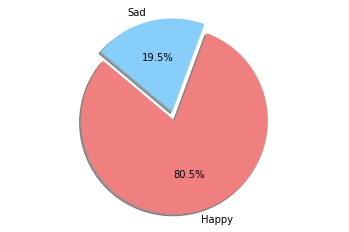

In [142]:
happy_songs = df[df['happy'] == True].count()[0]
sad_songs = df[df['happy'] == False].count()[0]

# Data to plot
labels = 'Happy', 'Sad'
sizes = [happy_songs, sad_songs]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### => As a conclusion of the sentiment analysis, most of Queen's songs are happy ones. 

### • Word Cloud
- Now let's visualize the word cloud of happy Queen songs to see what makes them this happy.

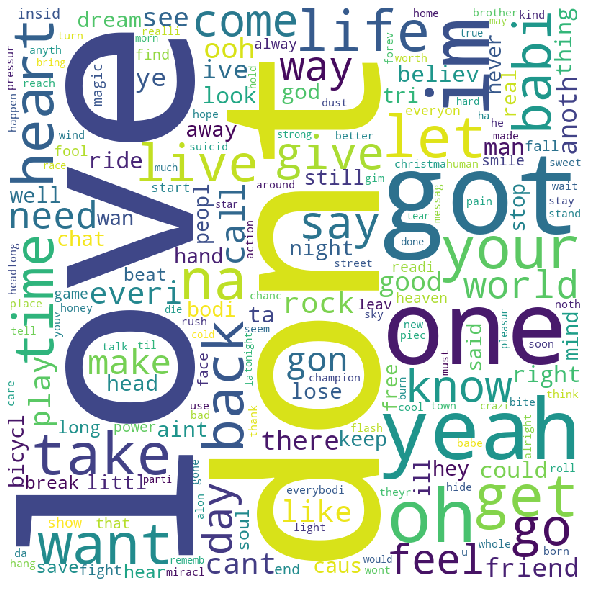

In [162]:
#Group Queen's happy songs (happy = true) and plot their word cloud
#TODO

#create the cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate_from_frequencies(sum(df.loc[df.happy].word_freq, Counter())) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## END OF PROJECT

##### Extra webscraping work (not used)

In [ ]:
# extracting album name and year 
url = "https://www.azlyrics.com/q/queen.html"

try:
    session = HTMLSession()
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11'}
    response = session.get(url)
     
except requests.exceptions.RequestException as e:
    print(e)

#Extracting the html of the response 
html = response.html

print(html.text)

#extracting the year and the name of each album and storing them in key value dictionnary 
html_album_info = list(html.find('.album'))
albums = dict()

for html in html_album_info:
    html_text = html.text
    # print("html_text : ", html_text)
    album = html_text.split('"')[1]
    year = html_text.split('(')[1].split(')')[0]
    albums[album] = year
    if year == '2008':
        break
